# Data Visualization exercise

In [1]:
# importing the package(s) we want to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### The input file is tab-delimited
tsv_Filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# we can specify the delimiter by using the sep keyword argument
euk = pd.read_csv(tsv_Filepath, sep='\t')

In [3]:
### Using .head() and .tail() to see data content
euk.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200,37660,2010,Chromosome


In [4]:
### .info() to provide information on the data
euk.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             8302 non-null   object 
 1   Kingdom             8302 non-null   object 
 2   Class               8302 non-null   object 
 3   Size (Mb)           8302 non-null   float64
 4   GC%                 8302 non-null   object 
 5   Number of genes     8302 non-null   object 
 6   Number of proteins  8302 non-null   object 
 7   Publication year    8302 non-null   int64  
 8   Assembly status     8302 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 583.9+ KB


In [49]:
### What to do with '-' values?
## Change "-" into NAs
euk = euk.replace('-', pd.NA)
euk
euk.isna() # on missing values



,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,gene density
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8297,False,False,False,False,False,True,True,False,False,True
8298,False,False,False,False,False,False,False,False,False,False
8299,False,False,False,False,False,True,True,False,False,True
8300,False,False,False,False,False,True,True,False,False,True


## Visualize the relationship between two variables

Can you see the relationship between genome size and the number of genes?



It is hard for us to see patterns by reading large tables of data. For example, look at the following table that contains the genome size and the number of genes for reptiles. Can you see the relationship between genome size and the number of genes?

In [50]:
## Look only look at reptile data using class 'Reptiles'
rept = euk.loc[euk['Class'] == 'Reptiles']
rept

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,gene density
282,Anolis carolinensis,Animals,Reptiles,1799.14,40.8238,22092.0,34827,2007,Chromosome,12.279200
543,Sphenodon punctatus,Animals,Reptiles,4272.21,<NA>,NaN,<NA>,2018,Scaffold,NaN
565,Pogona vitticeps,Animals,Reptiles,1716.68,42.1,21445.0,38203,2015,Scaffold,12.492136
589,Platysternon megacephalum,Animals,Reptiles,2319.09,43.9,NaN,<NA>,2018,Scaffold,NaN
612,Podarcis muralis,Animals,Reptiles,1511.00,44.2057,NaN,<NA>,2019,Chromosome,NaN
650,Cuora amboinensis,Animals,Reptiles,2214.83,43.9,NaN,<NA>,2019,Scaffold,NaN
730,Ophiophagus hannah,Animals,Reptiles,1594.07,40.6,NaN,<NA>,2013,Scaffold,NaN
944,Chrysemys picta bellii,Animals,Reptiles,2365.77,44.564,25289.0,46651,2012,Chromosome,10.689543
1122,Chelonia mydas,Animals,Reptiles,2208.41,43.7,22336.0,28672,2013,Scaffold,10.114064
1136,Alligator mississippiensis,Animals,Reptiles,2161.73,44.4,25012.0,42388,2012,Scaffold,11.570363


In [10]:
## Pick out data for just Reptiles with genome size < 4000
rep = euk.loc[(euk['Class'] == 'Reptiles') & (euk['Size (Mb)'] < 4000)]
rep

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
282,Anolis carolinensis,Animals,Reptiles,1799.14,40.8238,22092,34827,2007,Chromosome
565,Pogona vitticeps,Animals,Reptiles,1716.68,42.1,21445,38203,2015,Scaffold
589,Platysternon megacephalum,Animals,Reptiles,2319.09,43.9,<NA>,<NA>,2018,Scaffold
612,Podarcis muralis,Animals,Reptiles,1511.00,44.2057,<NA>,<NA>,2019,Chromosome
650,Cuora amboinensis,Animals,Reptiles,2214.83,43.9,<NA>,<NA>,2019,Scaffold
730,Ophiophagus hannah,Animals,Reptiles,1594.07,40.6,<NA>,<NA>,2013,Scaffold
944,Chrysemys picta bellii,Animals,Reptiles,2365.77,44.564,25289,46651,2012,Chromosome
1122,Chelonia mydas,Animals,Reptiles,2208.41,43.7,22336,28672,2013,Scaffold
1136,Alligator mississippiensis,Animals,Reptiles,2161.73,44.4,25012,42388,2012,Scaffold
1150,Crocodylus porosus,Animals,Reptiles,2049.54,44.2,19551,28676,2016,Scaffold


### Use `relplot` to look at relationships
We will use the `relplot` function, and the names of the columns that we want on the `X` and `Y` axes to look at the relationship between genome size and number of genes in Reptiles

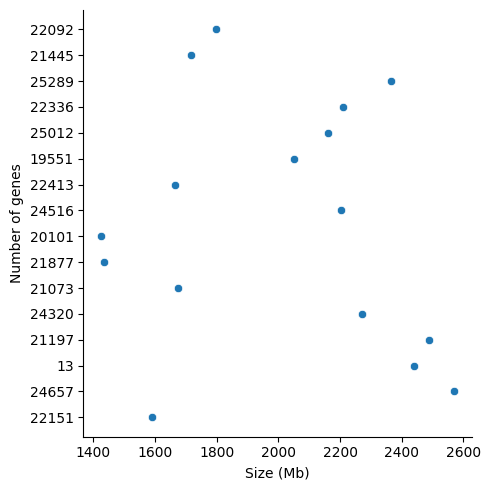

In [40]:
from typing import Any
### Relationship plot between genome size and number of genes in Retiles
new_rep = rept.dropna(how="any")
new_rep

plot_rep = sns.relplot(data = new_rep, x = 'Size (Mb)', y = 'Number of genes', kind = 'scatter')

### Can you create a new column to look at gene density?
gene density = Number of genes / Size (Mb)

In [44]:
### Your Code
#gene_density = Number of genes / Size (Mb)
# create the new column
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'], errors='coerce')
euk['Size (Mb)'] = pd.to_numeric(euk['Size (Mb)'], errors='coerce')
euk['gene density'] = euk['Number of genes'] / euk['Size (Mb)']
euk


,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,gene density
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549.0,38554,2013,Scaffold,229.901715
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311.0,48265,2001,Chromosome,320.141390
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847.0,71219,2010,Chromosome,61.127873
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603.0,41939,2011,Chromosome,91.065184
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200.0,37660,2010,Chromosome,37.665284
...,...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,NaN,<NA>,2017,Scaffold,NaN
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155.0,298,1992,Chromosome,264.162069
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,NaN,<NA>,2018,Chromosome,NaN
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,NaN,<NA>,2018,Chromosome,NaN


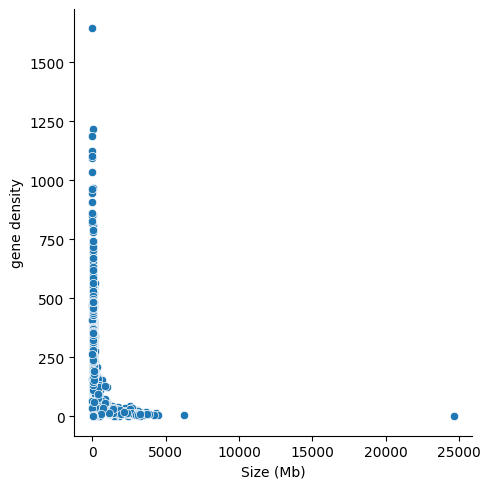

In [45]:
### Create the plot that represents the relation between Size (Mb) and density
# Is it what you expected?
svd_plot = sns.relplot(data = euk, x = 'Size (Mb)', y = 'gene density', kind = 'scatter')
#THis is what we expect to see base on the previous plot, the smaller size, the larger amount of gene.

## Seaborn
These are other `kind` plots that we did not try in lectures. Look up seaborn documentation and try to create these new plots.

1.   Create a violin plot for genome size distribution against Class Land Plants.
2.   Create a scatter plot showing the relationship between Kingdom and Publication year
3. Create a bar plot for GC% for each Kingdom

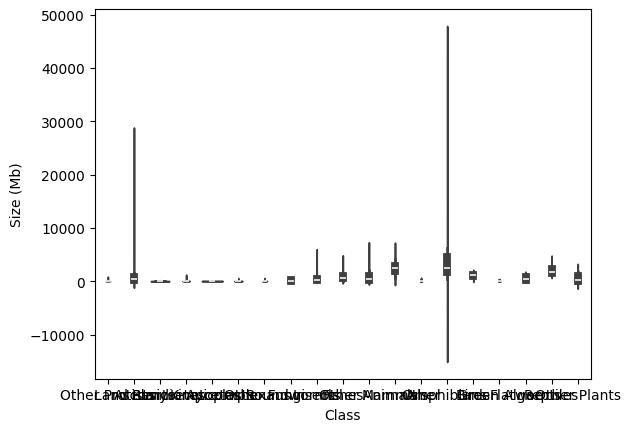

In [51]:
### Your code - Create a violin plot for genome size distribution against Class Land Plants.
euk.dropna(how="any")
vplot = sns.violinplot(data = euk, x = 'Class', y = 'Size (Mb)')

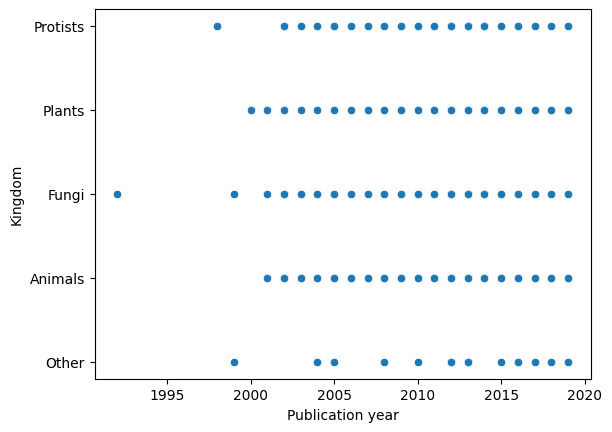

In [52]:
### Your code - Create a scatter plot showing the relationship between Kingdom and Publication year
scat_plot = sns.scatterplot(data = euk, x = 'Publication year', y = 'Kingdom')

<ipython-input-55-6d9fccfd68fd>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bplot.set_xticklabels(bplot.get_xticklabels(), rotation=180)


[Text(0, 0, 'Protists'),
 Text(1, 0, 'Plants'),
 Text(2, 0, 'Fungi'),
 Text(3, 0, 'Animals'),
 Text(4, 0, 'Other')]

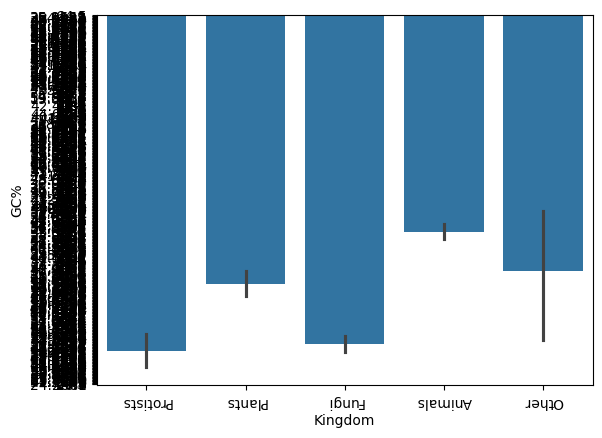

In [55]:
### Your code - Create a bar plot for GC% for each Kingdom

bplot = sns.barplot(data = euk, x = 'Kingdom', y = 'GC%')